In [1]:
import pandas as pd
import joblib
import shap
shap.initjs()
import seaborn as sns

from sklearn import metrics
loaded = joblib.load('best-models.joblib')
loaded.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'LinearRegression', 'RandomForestRegressor'])

In [2]:
def get_importances(model, feature_names=None,name='Feature Importance',
                   sort=False, ascending=True):
    
    ## checking for feature names
    if feature_names == None:
        feature_names = model.feature_names_in_
        
    ## Saving the feature importances
    importances = pd.Series(model.feature_importances_, index= feature_names,
                           name=name)
    
    # sort importances
    if sort == True:
        importances = importances.sort_values(ascending=ascending)
        
    return importances

In [3]:
def plot_importance(importances, top_n=None,  figsize=(8,6)):
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Importance',
            ylabel='Feature Names',
            title=title)
    ## return ax in case want to continue to update/modify figure
    return ax

In [4]:
# Loading in Data from joblib
X_train_df = loaded['X_train']
y_train = loaded['y_train']
X_test_df = loaded['X_test']
y_test = loaded['y_test']
preprocessor = loaded['preprocessor']
loaded_model_r = loaded['RandomForestRegressor']

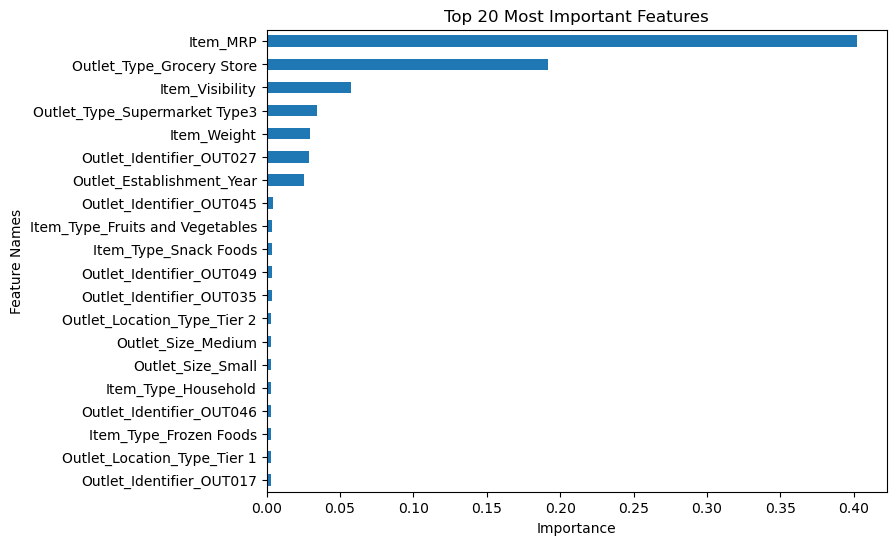

In [5]:
# Getting the Top Most Important Features
rf_importances = get_importances(loaded_model_r)
plot_importance(rf_importances,top_n=20);

In [6]:
# Defining X_shap
X_shap = shap.sample(X_train_df, nsamples = 100, random_state = 42)
X_shap.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
2937,-1.076715,-0.512371,0.787847,-1.293807,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6371,-0.761252,-0.696180,1.266775,1.327849,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3762,1.030720,-1.291052,-1.667054,0.017021,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
419,1.445803,-0.760232,-0.233883,1.089517,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8475,1.350927,0.285949,-0.789418,0.136187,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [7]:
# Defining y_shap
y_shap = y_train.loc[X_shap.index]
y_shap

2937    2285.0256
6371    2217.1140
3762     196.4110
419     2940.1728
8475     378.1744
          ...    
2076    2516.7240
3986    4250.4672
1267    1884.2140
454     2683.1740
7869    2626.5810
Name: Item_Outlet_Sales, Length: 100, dtype: float64

In [8]:
explainer = shap.Explainer(loaded_model_r)
explainer

In [9]:
## Getting the shap values
shap_values = explainer(X_shap,y_shap)
type(shap_values)

shap._explanation.Explanation

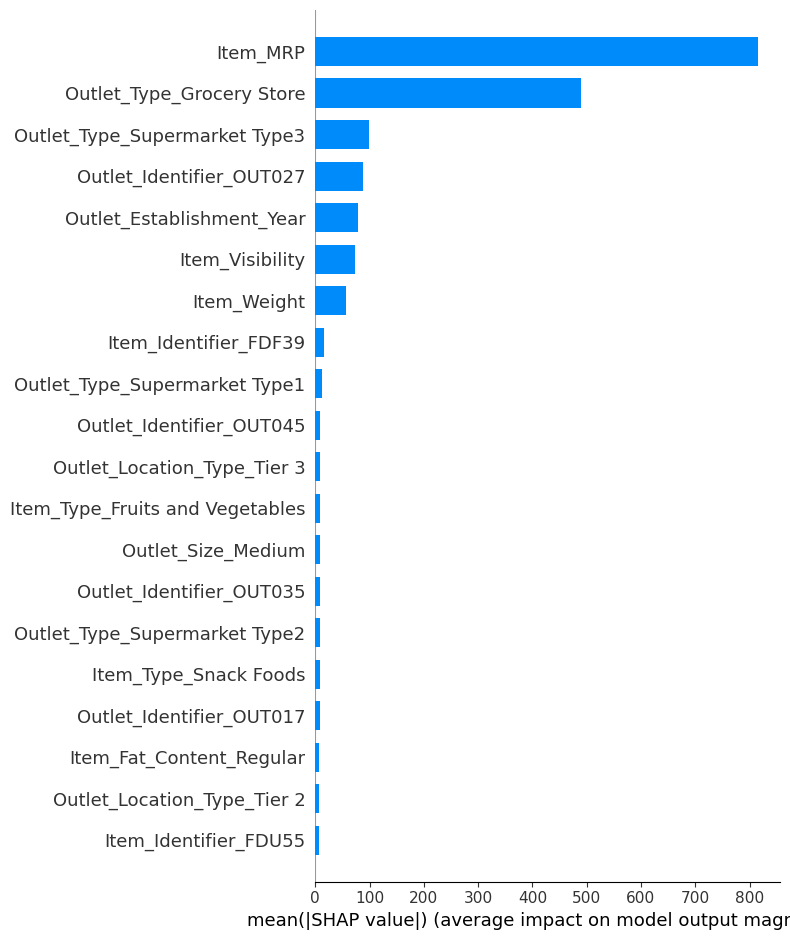

In [28]:
# SHAP Plot with bars
shap.summary_plot(shap_values, features = X_shap, plot_type = 'bar')

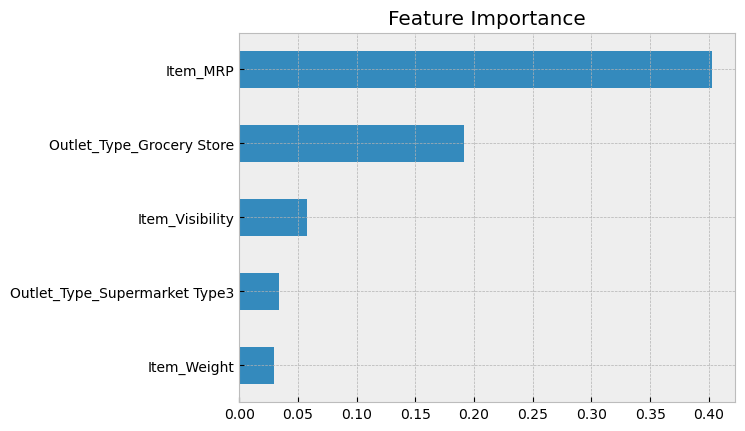

- Are they the same features in both? If not, what's different?
    - Most of the features are the same in both Plots.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


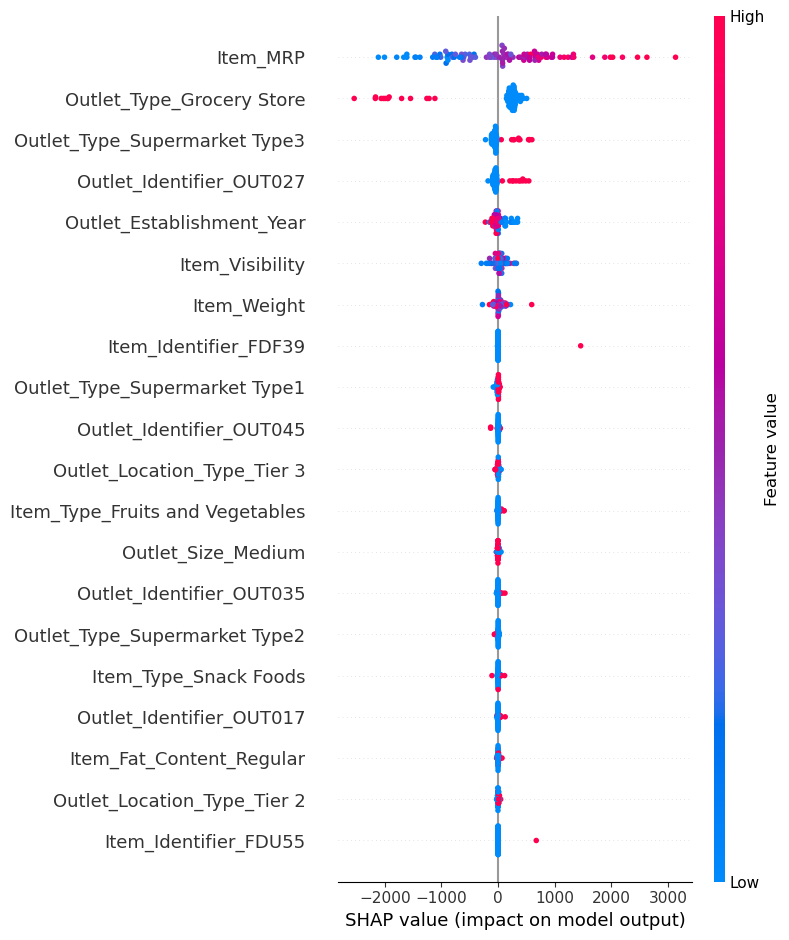

In [11]:
# SHAP Plot with dots
shap.summary_plot(shap_values, X_shap)

- Interpret the top 3 most important features and how they influence your model's predictions.
    - Item_MRP and Outlet_Type_Supermarket Type3 features highest values are on the positive side.
    - Oulet_Type_Grocery Store feature highest values are on the negative side.

# Local Explanations

In [21]:
# Defining LOCAL X_shap and y_shap
X_shap_local = X_shap.reset_index(drop=True)
y_shap_local = y_shap.reset_index(drop=True)
X_shap_local["Item_MRP"].value_counts()

-1.222585    2
 0.787847    1
-0.386466    1
-0.476773    1
 0.158941    1
            ..
-0.190852    1
-1.552207    1
-0.483748    1
 1.437974    1
 0.543319    1
Name: Item_MRP, Length: 99, dtype: int64

In [22]:
# Using and importing LimeTabularExplainer
from lime.lime_tabular import LimeTabularExplainer
lime_explainer =LimeTabularExplainer(training_data=X_shap.values, feature_names=X_shap.columns, mode='regression')
lime_explainer

In [23]:

X_shap_local.iloc[1]

Item_Weight                     -0.761252
Item_Visibility                 -0.696180
Item_MRP                         1.266775
Outlet_Establishment_Year        1.327849
Item_Identifier_DRA12            0.000000
                                   ...   
Outlet_Location_Type_Tier 3      1.000000
Outlet_Type_Grocery Store        0.000000
Outlet_Type_Supermarket Type1    0.000000
Outlet_Type_Supermarket Type2    1.000000
Outlet_Type_Supermarket Type3    0.000000
Name: 1, Length: 1592, dtype: float64

In [24]:
shap.force_plot(explainer.expected_value,
                shap_values = shap_values[1].values,
               features = X_shap_local.iloc[1])

In [27]:
exp = lime_explainer.explain_instance(X_shap.iloc[1],
                               loaded_model_r.predict)
exp.show_in_notebook()

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


In [26]:
# Outlet_Identifier_OUT010 lowest vs Outlet_Identifier_OUT027
